<a href="https://colab.research.google.com/github/Ayat-Nauman/ANN-Model-Training/blob/main/ANN_ASSIGNMENT_AYAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRAINING A MODEL USING ARTIFICIAL NEURAL NETWORK**
**Table of Contents:**

*   **Training (0 hidden layers)**
*   **Training (1 hidden layers)**
*   **Training (2 hidden layers)**
*   **Training (3 hidden layers)**
*   **Training (4 hidden layers)**
*   **Training (5 hidden layers)**




## **Install Tensorflow and Import necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras import layers
import tensorflow as tf

## **Load the dataset - bullet_train (Excel) File**

In [ ]:
# Load the dataset
df = pd.read_excel('/content/bullet_train.xlsx')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3rd,male,22.0,1,7.2500
1,1,1st,female,38.0,1,71.2833
2,1,3rd,female,26.0,0,7.9250
3,1,1st,female,35.0,1,53.1000
4,0,3rd,male,35.0,0,8.0500


## **Data Pre-processing**
Fill the missing values and convert non-numeric data into numeric

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Fill missing 'Age' values with mean

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Pclass'] = df['Pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})

## **Split the dataset into Train and Test**

In [ ]:
# Define features (X) and target (y)
X = df[['Sex', 'Age', 'SibSp', 'Fare', 'Pclass']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Understand the data using Feature Correlations**

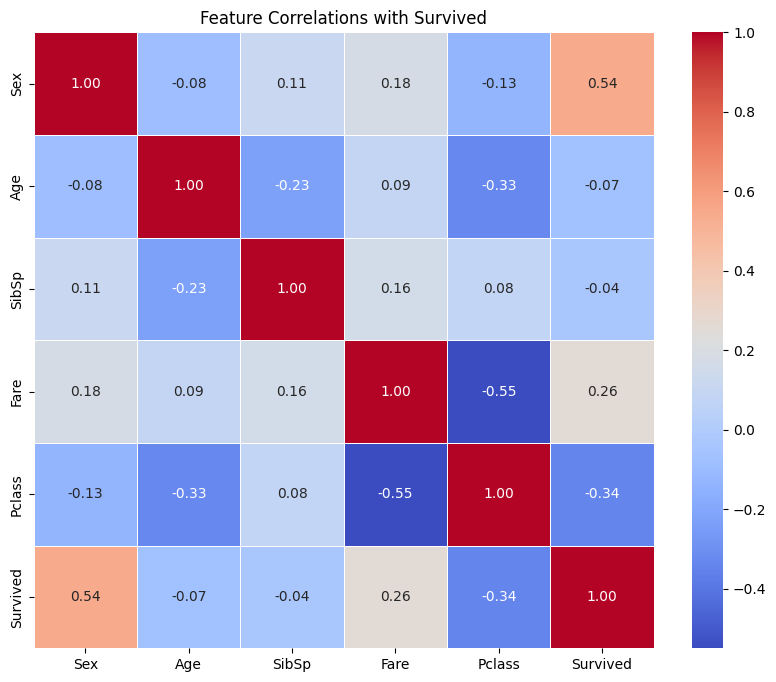

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = pd.concat([X, y], axis=1)
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlations with Survived')
plt.show()

## **Correlation values range from -1 to +1:**

+1 indicates a perfect positive correlation: as one feature increases, the other also increases.

-1 indicates a perfect negative correlation: as one feature increases, the other decreases.

0 means no correlation.

The **color bar** on the right shows the gradient of correlations, with red representing strong positive correlations, blue representing strong negative correlations, and white or light colors showing weak or no correlation.

## **Key Insights from the Heatmap:**
**Sex has a strong positive correlation (0.54) with Survived:**

This indicates that gender plays a significant role in survival, with a particular gender (likely females) having a higher chance of survival.

**Fare shows a moderate positive correlation (0.26) with Survived:**

This suggests that passengers who paid higher fares tended to survive more. This could indicate that higher-paying passengers (likely in better cabins or classes) had better survival rates.

**Pclass has a negative correlation (-0.34) with Survived:**

This means that passengers in higher classes (lower numeric value for Pclass) had a higher chance of survival, while those in lower classes (e.g., 3rd class) were less likely to survive.

**Other Features:**

Age has a very weak negative correlation (-0.07) with Survived, meaning that age doesn't have a strong impact on survival in your dataset.
SibSp (number of siblings/spouses aboard) has a weak negative correlation (-0.04) with Survived, indicating it’s not a strong factor in survival either.


## **Conclusion:**
Most important factors affecting survival: Sex, Fare, and Pclass. Gender (Sex) seems to be the most critical factor, followed by class (Pclass), and fare (Fare).
Less impactful features: Age and SibSp do not seem to play a significant role in survival based on this dataset.

## **Defining Model to iterate on Multiple Layers**

In [ ]:
# Function to build models
def build_model(num_layers, learning_rate=0.001):
    model = tf.keras.Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(layers.BatchNormalization())

    # Add hidden layers based on num_layers
    for _ in range(num_layers):
        model.add(Dense(64, activation='relu'))  # Hidden layers

    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification
    model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

## **Finding Training and Testing Accuracy of Individual Layer**

In [ ]:
# Track performance of different models
layer_counts = [0, 1, 2, 3, 4, 5]
train_accuracies = []
test_accuracies = []

for num_layers in layer_counts:
    model = build_model(num_layers)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

    # Evaluate on train and test sets
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

## **Plotting Training and Testing Accuracy vs. Number of Layers**

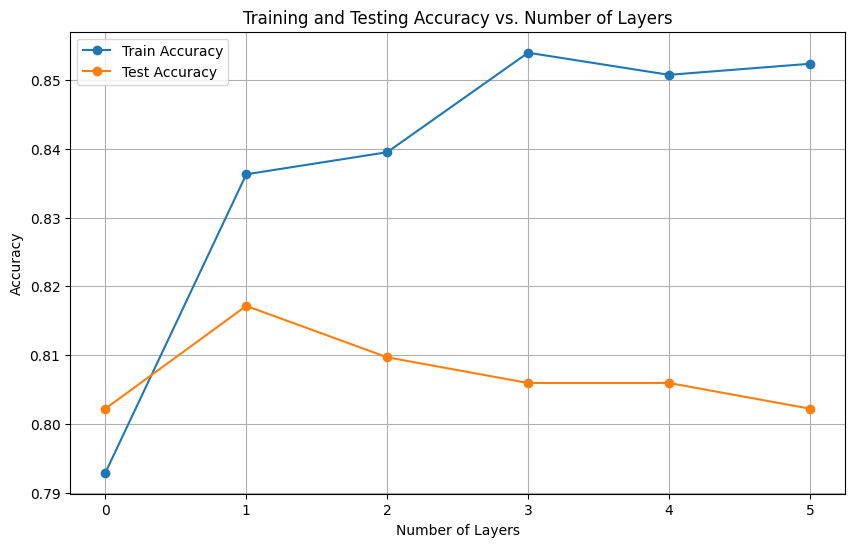

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(layer_counts, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(layer_counts, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Number of Layers')
plt.legend()
plt.grid(True)
plt.xticks(layer_counts)
plt.show()

## **Final Training and Test accuracies along with data size**

In [ ]:
# Print the training and test accuracies, along with data size
print(f"Train size = {X_train.shape[0]} rows")
print(f"Test size = {X_test.shape[0]} rows")
print(f"Final Train accuracy (5 layers) = {train_accuracies[-1] * 100:.2f}%")
print(f"Final Test accuracy (5 layers) = {test_accuracies[-1] * 100:.2f}%")

Train size = 623 rows
Test size = 268 rows
Final Train accuracy (5 layers) = 85.23%
Final Test accuracy (5 layers) = 80.22%
